# Social Network Analysis - Amber Heard Case - Twitter

# Investigate Same Text
Adel Abu Hashim

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
from ast import literal_eval as le

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import *

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import ast
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data_path = "../../twitter_data/"

In [3]:
# load commnets data with text processing
df_tweets_2022_prepared = pd.read_csv(data_path+"2022_prepared_tweets.csv")

In [4]:
df_metrics_2022 = pd.read_csv(data_path+"2022 Tweets_Metrics.csv")


In [5]:
df_tweets_2022_prepared = df_tweets_2022_prepared.drop_duplicates(subset=["id"])

In [6]:
df_tweets_2022_prepared.head()

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"['yeah', 'snyder', 'involved', 'flash', 'would...","['soldierboy43001', 'ZakReckless']",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"['forgot', 'hook', 'amber', 'heard', 'sure', '...","['IIMissMax', 'bg98021', 'GerberKawasaki']",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"['never', 'seen', 'aquaman', 'amber', 'heard']",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"['bl', 'content', 'anime', 'manga', 'manhwa', ..."


In [7]:
df_tweets_2022_prepared["created_at"] = pd.to_datetime(df_tweets_2022_prepared["created_at"])
df_tweets_2022_prepared["user_created_at"] = pd.to_datetime(df_tweets_2022_prepared["user_created_at"])

In [8]:
data_investigation(df_tweets_2022_prepared)

Data Head


,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."


______________________________________________________________________________

Data Shape


'The data has 497291 rows and 13 columns'

______________________________________________________________________________

Columns


['id',
 'created_at',
 'clean_text',
 'text_tokens',
 'mentions',
 'n_mentions',
 'hashtags',
 'n_hashtags',
 'user_id',
 'user_name',
 'user_created_at',
 'user_description',
 'user_description_tokens']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                                              int
created_at                 pandas._libs.tslibs.timestamps.Timestamp
clean_text                                                      str
text_tokens                                                     str
mentions                                                        str
n_mentions                                                      int
hashtags                                                        str
n_hashtags                                                      int
user_id                                                       float
user_name                                                       str
user_created_at            pandas._libs.tslibs.timestamps.Timestamp
user_description                                                str
user_description_tokens                                         str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


user_description           67557
user_description_tokens    67557
clean_text                 58134
text_tokens                58134
user_id                        3
user_name                      3
user_created_at                3
created_at                     2
id                             0
mentions                       0
n_mentions                     0
hashtags                       0
n_hashtags                     0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


user_description           0.135850
user_description_tokens    0.135850
clean_text                 0.116901
text_tokens                0.116901
user_id                    0.000006
user_name                  0.000006
user_created_at            0.000006
created_at                 0.000004
id                         0.000000
mentions                   0.000000
n_mentions                 0.000000
hashtags                   0.000000
n_hashtags                 0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,n_mentions,n_hashtags,user_id
count,497291.000000,497291.000000,4.972880e+05
mean,0.391753,1.194592,7.456669e+17
std,1.026533,1.649079,6.286331e+17
min,0.000000,0.000000,1.968000e+03
25%,0.000000,0.000000,7.726700e+08
50%,0.000000,1.000000,9.545771e+17
75%,1.000000,2.000000,1.331698e+18
max,50.000000,23.000000,1.519822e+18


______________________________________________________________________________



In [9]:
def fix_lists_columns(df, columns):
    def fix(r):
        if str(r) == "None" or str(r) == "nan":
            return r
        else:
            return le(r)
    for col in columns:
        df[col] = df[col].apply(lambda x: fix(x))

In [10]:
fix_lists_columns(
    df_tweets_2022_prepared,
    ["text_tokens", "user_description_tokens", "mentions", "hashtags",],
)

In [11]:
data_investigation(df_metrics_2022)

Data Head


,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,created_at,text,author.id,author.username
0,1477504983130116096,1,0,2.0,0.0,2022-01-02T05:00:13.000Z,@la77465262 @Melinda15199317 @Dior So why is #...,1.149795e+08,seano999
1,1477503751716065280,0,0,2.0,0.0,2022-01-02T04:55:19.000Z,Only thing I want them to leave alone is the f...,1.426227e+18,WonderWilson18


______________________________________________________________________________

Data Shape


'The data has 506657 rows and 9 columns'

______________________________________________________________________________

Columns


['id',
 'public_metrics.retweet_count',
 'public_metrics.reply_count',
 'public_metrics.like_count',
 'public_metrics.quote_count',
 'created_at',
 'text',
 'author.id',
 'author.username']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                int
public_metrics.retweet_count      int
public_metrics.reply_count        int
public_metrics.like_count       float
public_metrics.quote_count      float
created_at                        str
text                              str
author.id                       float
author.username                   str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


author.id                       23158
author.username                 23158
public_metrics.like_count           1
public_metrics.quote_count          1
created_at                          1
text                                1
id                                  0
public_metrics.retweet_count        0
public_metrics.reply_count          0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


author.id                       0.045707
author.username                 0.045707
public_metrics.like_count       0.000002
public_metrics.quote_count      0.000002
created_at                      0.000002
text                            0.000002
id                              0.000000
public_metrics.retweet_count    0.000000
public_metrics.reply_count      0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,public_metrics.retweet_count,public_metrics.like_count,public_metrics.quote_count,author.id
count,5.066570e+05,506656.000000,506656.000000,4.834990e+05
mean,4.798429e+01,47.225176,0.727719,7.389797e+17
std,2.976961e+04,2247.787727,36.033358,6.282754e+17
min,0.000000e+00,0.000000,0.000000,1.968000e+03
25%,0.000000e+00,0.000000,0.000000,7.318198e+08
50%,0.000000e+00,1.000000,0.000000,9.423402e+17
75%,0.000000e+00,5.000000,0.000000,1.329510e+18
max,2.118879e+07,666427.000000,18855.000000,1.519822e+18


______________________________________________________________________________



In [12]:
df_metrics_2022 = df_metrics_2022[
    [
        "id",
        "public_metrics.retweet_count",
        "public_metrics.reply_count",
        "public_metrics.like_count",
        "public_metrics.quote_count",
    ]
]

In [13]:
df_metrics_2022.columns = [
    "id",
    "retweet_count",
    "reply_count",
    "like_count",
    "quote_count",
]

In [14]:
df_metrics_2022.head(5)

,id,retweet_count,reply_count,like_count,quote_count
0,1477504983130116096,1,0,2.0,0.0
1,1477503751716065280,0,0,2.0,0.0
2,1477499814719983617,0,0,12.0,0.0
3,1477497740498292738,0,0,0.0,0.0
4,1477496477484212225,0,0,1.0,0.0


<a id='top'></a>
## Top repeated text





In [15]:
def hanlde_nan_and_null(x,fun,r):
    if str(x) == "None" or str(x) == "nan":
        return r
    else:
        return fun(x)

In [16]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: hanlde_nan_and_null(x, set, {})
)

In [17]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: set(x) - {"https"}
)

In [18]:
df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].shape

(426121,)

In [19]:
df_tweets_2022_prepared

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"{say, johnny, court, stans, knows, uk, waste, ...","[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","[young, guy, varied, interests, socialist, eur..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"{need, alone, thing, leave, woman, 1, phase, a...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","[fuck, rules, favorite, k2, avril, lavigne, wo..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"{yeah, flash, would, involved, heard, snyder, ...","[soldierboy43001, ZakReckless]",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"{sure, find, hook, stress, heard, someone, amb...","[IIMissMax, bg98021, GerberKawasaki]",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"{never, aquaman, heard, seen, amber}",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"[bl, content, anime, manga, manhwa, nsfw, simm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573775,1515569901158600704,2022-04-17 05:56:37+00:00,gender card pulled out. they are now spinning ...,"{kawawa, johnny, fact, attempting, follow, dep...",[],0,[],0,2.701354e+07,GhelSandra,2009-03-27 14:25:52+00:00,tomasino est 2000something art educator.person...,"[tomasino, 2000something, art, sayaka, akimoto..."
573776,1515569890391961601,2022-04-17 05:56:34+00:00,amber heard is a libra moon. ive known a few l...,"{always, guilty, get, along, use, women, libra...",[],0,[],0,1.418420e+18,lilithrising_,2021-07-23 03:59:18+00:00,NaN,NaN
573777,1515569612686970883,2022-04-17 05:55:28+00:00,NaN,{},[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2,3.303069e+09,CJMoss007,2015-08-01 07:03:17+00:00,#justiceforjohnnydepp,[justiceforjohnnydepp]
573778,1515569604818575368,2022-04-17 05:55:26+00:00,"amber heard is dating eve fartlow, chelsea man...","{fartlow, chelsea, illuminati, feel, manning, ...",[],0,[],0,1.319471e+18,Jankem69420,2020-10-23 02:50:36+00:00,''virtue-signalling geopolitically ignorant ca...,"[geopolitically, ignorant, cartoon, mouse, lam..."


In [20]:
import time
start_time = time.time()
values = df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].apply(tuple).value_counts()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.3224782943725586 seconds ---


In [21]:
values

(johnny, depp)                                                                                                                                                                                                3248
(amber, heard)                                                                                                                                                                                                2953
(fuck, amber, heard)                                                                                                                                                                                          2601
(petition, 2, sign, entertainment, via, aquaman, heard, dc, remove, amber)                                                                                                                                    2440
(except, morning, everyone, heard, good, amber)                                                                                                             

In [22]:
values = pd.DataFrame(values).reset_index().rename(columns={"index": "tokens", "text_tokens": "n_tweets"})

In [23]:
values["tokens"][0]

('johnny', 'depp')

### Values initil LOOK!

In [24]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][0])]

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
148,1477505479777697795,2022-01-02 05:02:11+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
208,1477672867420585993,2022-01-02 16:07:20+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
431,1477718860333735937,2022-01-02 19:10:05+00:00,johnny depp \n\n\n https://t.co/fxbmihk6ty,"{johnny, depp}",[],0,"[JohnnyDepp, JusticeForJohnnyDepp, WeStandWith...",4,1.383410e+18,Carolin47226771,2021-04-17 13:21:36+00:00,"i am a writer, fun, enjoy with friends in twit...","[writer, fun, enjoy, friends, twitter, simple,..."
868,1478374264797421570,2022-01-04 14:34:26+00:00,johnny depp,"{johnny, depp}",[],0,"[AmberHeardIsAnAbuser, AmberHeardIsALiar, Just...",3,2.519452e+07,missomgsrsly,2009-03-19 00:19:27+00:00,"i support johnny depp 110%, he is a dv survivo...","[support, johnny, depp, 110, dv, survivor, lic..."
1236,1478860734025113600,2022-01-05 22:47:29+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567964,1510915170574516224,2022-04-04 09:40:22+00:00,johnny depp\n \n https://t.co/akaq8aodud,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",4,3.318099e+08,TopDepp,2011-07-08 19:07:24+00:00,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota..."
567965,1510915044955017218,2022-04-04 09:39:52+00:00,johnny depp\n \n https://t.co/ptclfymbou,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",4,3.318099e+08,TopDepp,2011-07-08 19:07:24+00:00,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota..."
569788,1515541263541493763,2022-04-17 04:02:49+00:00,johnny depp,"{johnny, depp}",[PipocaRefil],1,[JusticeForJohnnyDepp],1,8.489107e+17,MartinsdeCamila,2017-04-03 14:50:57+00:00,NaN,NaN
571026,1515788191374082050,2022-04-17 20:24:01+00:00,johnny depp,"{johnny, depp}",[],0,"[JohnnyDeppIsInnocent, JusticeForJohnnyDepp, A...",5,2.519452e+07,missomgsrsly,2009-03-19 00:19:27+00:00,"i support johnny depp 110%, he is a dv survivo...","[support, johnny, depp, 110, dv, survivor, lic..."


In [25]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][1])].clean_text.value_counts()

amber heard                            814
amber heard?                           128
amber heard.                            79
who is amber heard?                     22
amber heard what?                       19
                                      ... 
amber heard https://t.co/rfoa1dotik      1
who's "amber heard"                      1
against amber heard? nah                 1
amber heard has a cat?                   1
amber heard this                         1
Name: clean_text, Length: 1550, dtype: int64

In [26]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][3])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ibqxgaollz via                          5
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/u13fwk01tj via                          3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8ufry4v5oh via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jskuhhkmz0 via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/sznzup1qah via                          2
                                                                                                                             ..
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/zcrw1oz6lz via                          1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/4gd7w8hnz8 via    

In [27]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][4])].clean_text.value_counts()

good morning to everyone except amber heard                                                      211
good morning to everyone except amber heard.                                                      80
good morning to everyone, except amber heard                                                      10
good morning to everyone, except amber heard.                                                      9
good morning everyone except amber heard                                                           9
good morning to everyone except for amber heard                                                    8
good morning to everyone except for amber heard.                                                   6
good morning to everyone except amber heard!                                                       5
good morning everyone, except amber heard                                                          3
good morning everyone except amber heard.                                                  

In [28]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][5])].clean_text.value_counts()

yes                              51
yes!                             39
yes i am                         24
yes!!                            13
yes, i am                        12
                                 ..
yes.  https://t.co/nuint9h2xw     1
yes. it should.                   1
yes he is!!                       1
yes yes yes yes                   1
yes they do                       1
Name: clean_text, Length: 113, dtype: int64

In [29]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][6])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jsj5qax0f2 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/7mcs8zjxlx via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/mtkrgk2vbn via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jvudnhstf5 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/blenkk2mee via    1
                                                                                                        ..
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/k2n3trddge via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/bayq56gn6r via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/choeadep9d via    1
dc entertainment: remove amber heard 

In [30]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][8])].clean_text.value_counts()

love this               22
i love him              14
love it                 10
we love you             10
love it!                 8
                        ..
we love you.             1
love for                 1
i just love him!!        1
i love u                 1
i love love love....     1
Name: clean_text, Length: 155, dtype: int64

In [31]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][10])].clean_text.value_counts()

fuck amber heard all my homies hate amber heard                             61
fuck amber heard, all my homies hate amber heard                            34
fuck amber heard. all my homies hate amber heard.                           19
fuck amber heard. all my homies hate amber heard                            18
fuck amber heard\nall my homies hate amber heard                            11
fuck amber heard all the homies hate amber heard                            10
fuck amber heard, me and my homies hate amber heard                          4
fuck amber heard me and my homies hate amber heard                           4
fuck amber heard. all the homies hate amber heard                            4
fuck amber heard, all my homies hate amber heard.                            4
fuck amber heard.\nall my homies hate amber heard.                           3
fuck amber heard! all my homies hate amber heard!                            3
fuck amber heard me and all my homies hate amber hea

In [32]:
values.head(1)

,tokens,n_tweets
0,"(johnny, depp)",3248


In [33]:
values.head(10)["tokens"][0]

('johnny', 'depp')

In [34]:
values["tokens"] = values["tokens"].apply(set)

In [35]:
values["tokens"] = values["tokens"].astype(str)

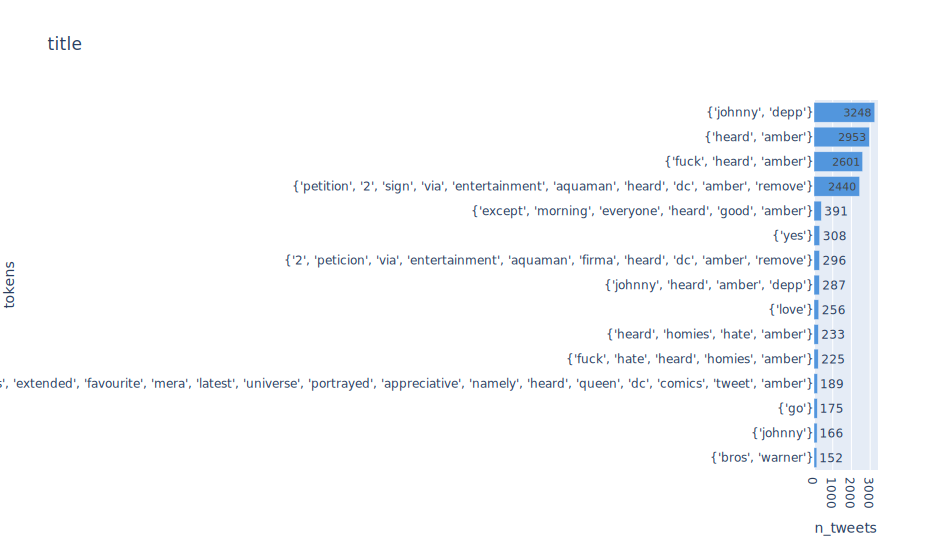

In [36]:
barh(values.head(15), "title", threshold=float("inf"), c=0)

In [37]:
values 

,tokens,n_tweets
0,"{'johnny', 'depp'}",3248
1,"{'heard', 'amber'}",2953
2,"{'fuck', 'heard', 'amber'}",2601
3,"{'petition', '2', 'sign', 'via', 'entertainmen...",2440
4,"{'except', 'morning', 'everyone', 'heard', 'go...",391
...,...,...
359729,"{'disorder', 'abuse', 'something', 'unfair', '...",1
359730,"{'incel', 'elon', 'dream', 'heard', 'turned', ...",1
359731,"{'irony', 'ironic', 'depp', '27th', 'really', ...",1
359732,"{'acredito', 'borderline', 'heard', 'nao', 'am...",1


In [38]:
df_tweets_2022_prepared["date"] = df_tweets_2022_prepared.created_at.dt.date
df_tweets_2022_prepared["year"] = df_tweets_2022_prepared.created_at.dt.year
df_tweets_2022_prepared["month"] = df_tweets_2022_prepared.created_at.dt.month
df_tweets_2022_prepared["dayofmonth"] = df_tweets_2022_prepared.created_at.dt.day

In [39]:
class SameText:
    def __init__(self, df, token):
        self.token_df = df[df.text_tokens == set(le(token))]
        self.token = token

    def n_commnets_unique(self):
        print(
            f"This comment appeared in {self.token_df.clean_text.value_counts().shape[0]} shape"
        )

    def get_df(self):
        return self.token_df

    def get_stats(self):
        users = self.token_df.user_name.nunique()
        print(
            f"This text appeared {self.token_df.shape[0]} in {self.token_df.clean_text.value_counts().shape[0]} shape from {users} users "
        )

    def users(self):
        return self.token_df.user_name.value_counts()

    def dates(self):
        return self.token_df.date.value_counts()

    def head(self, n):
        return self.token_df.head(n)

    def shapes(self, n):
        return self.token_df.clean_text.value_counts().head(n)

    def peak(self, n):
        bar_peaks(
            self.dates()
            .to_frame()
            .reset_index()
            .head(n)
            .rename(columns={"date": "n_comments"})
            .rename(columns={"index": "date"}),
            f"Peak Dates for {self.token}",
        )

    def date_info(self):
        min = self.dates().index.min()
        max = self.dates().index.max()
        print(f"The commentes were made between {min} and  {max}")
        print(
            self.token_df.groupby(self.token_df.created_at.dt.year)
            .count()["clean_text"]
            .to_frame()
            .rename(columns={"clean_text": "n_tweets"})
        )
        pie(
            self.token_df.groupby(self.token_df.created_at.dt.year)
            .count()["clean_text"]
            .to_frame()
            .reset_index(),
            "Numner of Comments Per Year",
        )

        facet_heat(self.token_df, title="Number of tweets Per Day")

        for year in self.token_df.year.unique():
            facet_days(self.token_df, str(int(year)))

    def users_dates(self, n):
        return (
            self.token_df.groupby(["username", "date"])
            .count()["message"]
            .sort_values(ascending=False)
            .head(n)
        )

    def df_timing(self):
        df = self.get_df()
        df = df.sort_values("created_at")
        df["diff"] = df.created_at.diff()
        return pd.concat([df, df["diff"].dt.components.iloc[:, 0:3]], axis=1)

    def get_groups(self, date):
        df = self.df_timing()
        return set(
            df[(df.days == 0) & (df.hours == 0) & (df.date.astype(str) == date)]
            .username.value_counts()
            .index
        )

    def get_metrics(self):
        df_with_merics = pd.merge(self.token_df, df_metrics_2022, how="left")
        metrics_dict = {
            "retweet_count": df_with_merics["retweet_count"].sum(),
            "reply_count": df_with_merics["reply_count"].sum(),
            "like_count": df_with_merics["like_count"].sum(),
            "quote_count": df_with_merics["quote_count"].sum(),
        }
        display(pd.Series(metrics_dict.values(), index=metrics_dict.keys(),))
    def get_times(self):
        df = self.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')
        print(f"{df.shape[0]} tweets from {self.token_df.shape[0]} tweets made in less than 1 min from previous tweet by {df.user_name.nunique()} users")

In [40]:
df_metrics_2022

,id,retweet_count,reply_count,like_count,quote_count
0,1477504983130116096,1,0,2.0,0.0
1,1477503751716065280,0,0,2.0,0.0
2,1477499814719983617,0,0,12.0,0.0
3,1477497740498292738,0,0,0.0,0.0
4,1477496477484212225,0,0,1.0,0.0
...,...,...,...,...,...
506652,1515569901158600704,0,0,0.0,0.0
506653,1515569890391961601,0,1,0.0,1.0
506654,1515569612686970883,1,0,2.0,0.0
506655,1515569604818575368,2,0,7.0,0.0


In [41]:
values.head(10)

,tokens,n_tweets
0,"{'johnny', 'depp'}",3248
1,"{'heard', 'amber'}",2953
2,"{'fuck', 'heard', 'amber'}",2601
3,"{'petition', '2', 'sign', 'via', 'entertainmen...",2440
4,"{'except', 'morning', 'everyone', 'heard', 'go...",391
5,{'yes'},308
6,"{'2', 'peticion', 'via', 'entertainment', 'aqu...",296
7,"{'johnny', 'heard', 'amber', 'depp'}",287
8,{'love'},256
9,"{'heard', 'homies', 'hate', 'amber'}",233


<a id='jd'></a>
### johnny depp

<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>



In [42]:
jd = SameText(df_tweets_2022_prepared, values.tokens[0])

In [43]:
jd.get_stats()

This text appeared 3248 in 212 shape from 150 users 


In [44]:
jd.get_metrics()

retweet_count     1472.0
reply_count        255.0
like_count       11082.0
quote_count        173.0
dtype: float64

In [45]:
jd.shapes(18)

johnny depp                                    2656
i johnny depp                                   367
i, johnny depp                                    6
i, johnny depp.                                   4
"i johnny depp"                                   4
this!\njohnny depp                                2
no sin johnny depp.                               2
for johnny depp                                   2
this ..... is johnny depp!                        2
i johnny depp...                                  1
i, johnny depp\n    https://t.co/irmeun8pwg       1
i,johnny depp                                     1
johnny depp  https://t.co/ran6jovnrw              1
i, johnny depp\nand he did.                       1
johnny depp\n\n https://t.co/5tbga5yi66           1
johnny depp\n  \n  https://t.co/g3ovu9arah        1
johnny depp\n  \n  https://t.co/b6hkrl1cfz        1
and so he did\n\ni johnny depp                    1
Name: clean_text, dtype: int64

In [46]:
jd.dates()

2022-04-21    479
2022-04-13    377
2022-04-26    367
2022-03-01    323
2022-04-20    322
             ... 
2022-03-14      1
2022-01-04      1
2022-03-22      1
2022-03-04      1
2022-03-07      1
Name: date, Length: 87, dtype: int64

In [47]:
jd.get_df().id.value_counts()

1477505479777697795    1
1519014678126551041    1
1518758056494084097    1
1518757918253928448    1
1518757745587068929    1
                      ..
1498469771922317316    1
1498469697255268355    1
1498469246199898112    1
1498468905626574858    1
1515759812935573507    1
Name: id, Length: 3248, dtype: int64

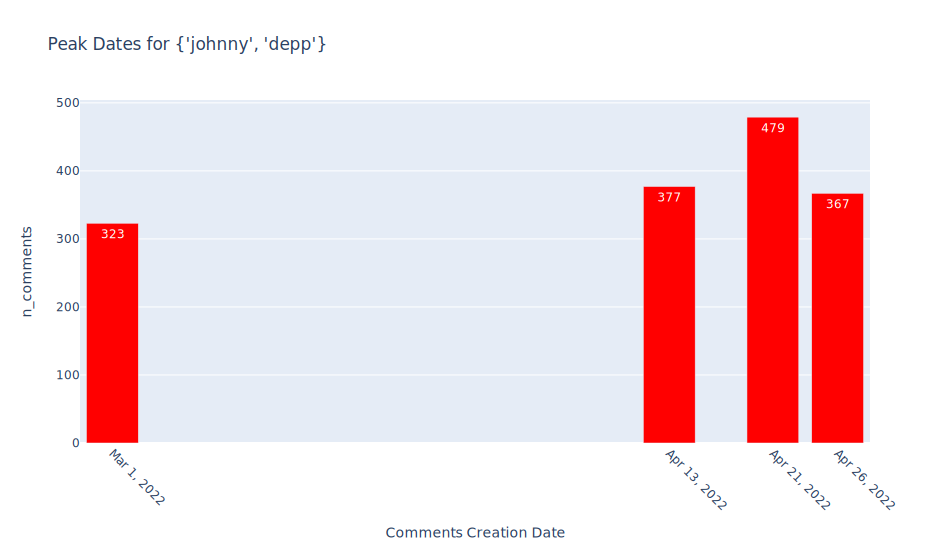

In [48]:
jd.peak(4)

In [49]:
jd.get_times()

1517 tweets from 3248 tweets made in less than 1 min from previous tweet by 31 users


In [50]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
1237,1478860586167545858,2022-01-05 22:46:54+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:55,0.0,0.0,0.0
1236,1478860734025113600,2022-01-05 22:47:29+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:35,0.0,0.0,0.0
1335,1478875384951230464,2022-01-05 23:45:42+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:10,0.0,0.0,0.0
1332,1478875811574865921,2022-01-05 23:47:24+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:35,0.0,0.0,0.0
12126,1483769417523773446,2022-01-19 11:52:50+00:00,johnny depp\n\n\n https://t.co/ymygerdwrd,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",3,3.318099e+08,TopDepp,...,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota...",2022-01-19,2022.0,1.0,19.0,0 days 00:00:31,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280854,1519004514262548482,2022-04-26 17:24:32+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:39,0.0,0.0,0.0
280829,1519004698241605633,2022-04-26 17:25:16+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:44,0.0,0.0,0.0
280764,1519005188459220999,2022-04-26 17:27:13+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:37,0.0,0.0,0.0
295018,1519014830556000257,2022-04-26 18:05:32+00:00,i johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:37,0.0,0.0,0.0


In [51]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

1237     0 days 00:00:55
1236     0 days 00:00:35
1335     0 days 00:00:10
1332     0 days 00:00:35
12126    0 days 00:00:31
               ...      
280854   0 days 00:00:39
280829   0 days 00:00:44
280764   0 days 00:00:37
295018   0 days 00:00:37
332986   0 days 00:00:24
Name: diff, Length: 1517, dtype: timedelta64[ns]

In [52]:
len(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

31

In [53]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

DeppSoldier_22     1264
BoteroStar          210
TopDepp              13
Martini0731           2
missomgsrsly          2
kermccoy              1
hy_anotherme          1
bryzwyf               1
Majik_Marjoram        1
majkearney            1
SimplyyShaina         1
thenewageicon         1
CinqueCaps            1
SarahEisen27          1
Lene42268156          1
mariamaria4848        1
Sailthe5Oceans        1
mmldtxt               1
brahstol              1
ReemDepp              1
selsmitch             1
nihalien              1
evegeorgia_           1
moonlight4522         1
carolinassll          1
RichsrdAnderson       1
turdefaroth           1
AraujoMartinski       1
AustenMathieson       1
KTN12201              1
77Sunflow             1
Name: user_name, dtype: int64

In [54]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    264
2022-04-26    258
2022-04-13    217
2022-02-28    188
2022-04-20    148
2022-03-01    116
2022-02-17     64
2022-03-25     62
2022-02-15     58
2022-04-06     35
2022-03-26     13
2022-02-16     12
2022-04-05     11
2022-03-16     11
2022-04-25      8
2022-03-24      7
2022-03-02      5
2022-04-12      5
2022-04-08      5
2022-01-05      4
2022-01-19      4
2022-04-07      3
2022-03-17      3
2022-04-19      3
2022-04-15      2
2022-02-23      2
2022-01-23      2
2022-04-04      1
2022-04-02      1
2022-03-30      1
2022-03-11      1
2022-02-27      1
2022-02-01      1
2022-04-28      1
Name: date, dtype: int64

In [55]:
list(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['DeppSoldier_22',
 'BoteroStar',
 'TopDepp',
 'Martini0731',
 'missomgsrsly',
 'kermccoy',
 'hy_anotherme',
 'bryzwyf',
 'Majik_Marjoram',
 'majkearney',
 'SimplyyShaina',
 'thenewageicon',
 'CinqueCaps',
 'SarahEisen27',
 'Lene42268156',
 'mariamaria4848',
 'Sailthe5Oceans',
 'mmldtxt',
 'brahstol',
 'ReemDepp',
 'selsmitch',
 'nihalien',
 'evegeorgia_',
 'moonlight4522',
 'carolinassll',
 'RichsrdAnderson',
 'turdefaroth',
 'AraujoMartinski',
 'AustenMathieson',
 'KTN12201',
 '77Sunflow']

In [56]:
jd.get_df().mentions.value_counts()

[]                                                                                                  3200
[DeppSoldier_22]                                                                                      11
[realamberheard]                                                                                       2
[PipocaRefil]                                                                                          2
[PlzeExplain512]                                                                                       2
[scrowder]                                                                                             2
[ZellnerLaw]                                                                                           2
[KathJenkins]                                                                                          1
[wbpictures]                                                                                           1
[ElectionWiz]                                          

In [57]:
jd.get_df().hashtags.value_counts()

[JusticeForJohnnyDepp]                                                                                                     2479
[JusticeForJohnnyDepp, JusticeForJohhnyDepp]                                                                                136
[JohnnyDepp, JusticeForJohnnyDepp]                                                                                           86
[JusticeForJohhnyDepp, JusticeForJohnnyDepp]                                                                                 51
[AmberTurd, AmberHeardIsALiar, JusticeForJohnnyDepp]                                                                         47
                                                                                                                           ... 
[JusticeForJohnnyDepp, JusticeForJohnnyDeppVirginia2022, Lunes]                                                               1
[AbuseHasNoGender, MenToo, AmberHeardIsAnAbuser, JusticeForJohnnyDeppVirginia2022]                      

<a id='ah'></a>
### amber heard
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [58]:
ah = SameText(df_tweets_2022_prepared, values.tokens[1])

In [59]:
ah.get_stats()

This text appeared 2957 in 1550 shape from 2561 users 


In [60]:
ah.get_metrics()

retweet_count     6109.0
reply_count       3225.0
like_count       90334.0
quote_count        537.0
dtype: float64

In [61]:
ah.shapes(18)

amber heard                814
amber heard?               128
amber heard.                79
who is amber heard?         22
amber heard what?           19
amber heard...              18
amber heard 2.0             15
is that amber heard?        14
amber heard*                13
and amber heard             13
amber heard ?               13
@ amber heard               13
amber heard!                13
amber heard is              12
not amber heard             12
amber heard:                11
what about amber heard?     11
who's amber heard?          10
Name: clean_text, dtype: int64

In [62]:
jd.dates()

2022-04-21    479
2022-04-13    377
2022-04-26    367
2022-03-01    323
2022-04-20    322
             ... 
2022-03-14      1
2022-01-04      1
2022-03-22      1
2022-03-04      1
2022-03-07      1
Name: date, Length: 87, dtype: int64

In [63]:
ah.get_df().id.value_counts()

1477545767858491399    1
1519595345617039362    1
1519792748051767298    1
1519789695445893120    1
1519789630027177984    1
                      ..
1517495061780566017    1
1517494819614072833    1
1517493863690039296    1
1517547271415607298    1
1515572685518036992    1
Name: id, Length: 2957, dtype: int64

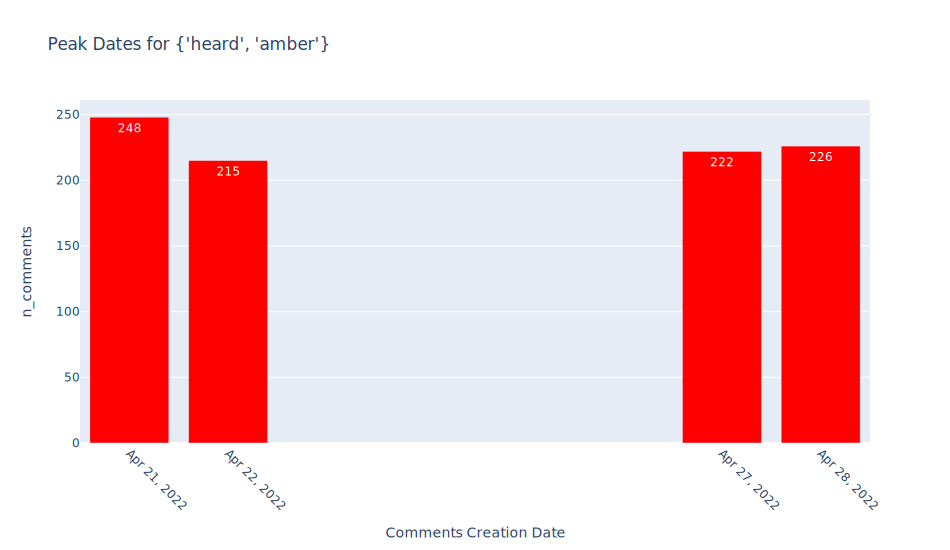

In [64]:
ah.peak(4)

In [65]:
ah.get_times()

315 tweets from 2957 tweets made in less than 1 min from previous tweet by 297 users


In [66]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
15259,1479984155010109445,2022-01-09 01:11:33+00:00,amber heard,"{amber, heard}",[],0,[],0,1.418558e+18,AHeardLatino,...,primera cuenta de amber heard ( @realamberhear...,"[primera, cuenta, amber, heard, realamberheard...",2022-01-09,2022.0,1.0,9.0,0 days 00:00:07,0.0,0.0,0.0
15031,1487157782788907008,2022-01-28 20:17:00+00:00,amber heard https://t.co/i4pmpvsn1a,"{amber, heard}",[],0,[],0,1.100133e+08,VinnyLopesRocks,...,i am ex-guitarist of the band emergency\nmore ...,"[band, emergency, today, known, daruma, 32, in...",2022-01-28,2022.0,1.0,28.0,0 days 00:00:45,0.0,0.0,0.0
30231,1493632821784633356,2022-02-15 17:06:29+00:00,amber heard https://t.co/9ticsajmkz,"{amber, heard}",[],0,[],0,1.270628e+18,cineasimetrico,...,aqui encontraras en una sola instantanea... ar...,"[aqui, encontraras, sola, instantanea, arte, f...",2022-02-15,2022.0,2.0,15.0,0 days 00:00:29,0.0,0.0,0.0
24708,1496365183819784194,2022-02-23 06:03:55+00:00,amber heard\n https://t.co/g9or0x1hnn,"{amber, heard}",[],0,[AmberHeard],1,1.475626e+18,deviloofhell,...,#actress #wallpapers,"[actress, wallpapers]",2022-02-23,2022.0,2.0,23.0,0 days 00:00:05,0.0,0.0,0.0
32987,1497403501235912706,2022-02-26 02:49:49+00:00,amber heard https://t.co/b4uqno1ilf,"{amber, heard}",[],0,[],0,1.008168e+09,SoniCubed,...,#liberty #greengop #greenconservative #bitcoin...,"[liberty, greengop, greenconservative, bitcoin...",2022-02-26,2022.0,2.0,26.0,0 days 00:00:17,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334596,1519787153961717760,2022-04-28 21:14:28+00:00,amber heard,"{amber, heard}",[JuanitoSay],1,[],0,1.158745e+09,EnzoCostasMedin,...,nada es obvio,[obvio],2022-04-28,2022.0,4.0,28.0,0 days 00:00:54,0.0,0.0,0.0
334074,1519789630027177984,2022-04-28 21:24:18+00:00,amber heard,"{amber, heard}",[Judithdez15],1,[],0,1.501032e+18,itsmajoliciouss,...,out of sight out of mind,"[sight, mind]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:47,0.0,0.0,0.0
334063,1519789695445893120,2022-04-28 21:24:34+00:00,me when amber heard:,"{amber, heard}",[],0,[],0,1.391615e+18,epexu1,...,merry padoru christmas!!!!!!,"[merry, padoru, christmas]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:16,0.0,0.0,0.0
333126,1519794795413180418,2022-04-28 21:44:50+00:00,amber heard https://t.co/3cmevazjo8,"{amber, heard}",[JuanitoSay],1,[],0,8.622280e+07,annaliliam,...,borahae,[borahae],2022-04-28,2022.0,4.0,28.0,0 days 00:00:12,0.0,0.0,0.0


In [67]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

15259    0 days 00:00:07
15031    0 days 00:00:45
30231    0 days 00:00:29
24708    0 days 00:00:05
32987    0 days 00:00:17
               ...      
334596   0 days 00:00:54
334074   0 days 00:00:47
334063   0 days 00:00:16
333126   0 days 00:00:12
347011   0 days 00:00:34
Name: diff, Length: 315, dtype: timedelta64[ns]

In [68]:
len(ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

297

In [69]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

cineasimetrico     7
VinnyLopesRocks    3
SoniCubed          3
Lilloisdu83        2
malpicasea         2
                  ..
poo_priest         1
la__lupita         1
ravetta_pier       1
bladeofmiqueIIa    1
tay__marvete       1
Name: user_name, Length: 297, dtype: int64

In [70]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    44
2022-04-27    42
2022-04-22    41
2022-04-28    32
2022-04-26    30
2022-04-25    25
2022-04-20    22
2022-04-23    19
2022-04-24    10
2022-04-14     9
2022-04-13     7
2022-04-15     3
2022-04-12     3
2022-04-06     3
2022-02-26     3
2022-03-23     2
2022-04-16     2
2022-03-17     2
2022-04-09     2
2022-04-08     1
2022-02-15     1
2022-02-23     1
2022-03-01     1
2022-03-14     1
2022-04-19     1
2022-03-24     1
2022-04-18     1
2022-04-17     1
2022-04-03     1
2022-04-04     1
2022-01-28     1
2022-04-10     1
2022-01-09     1
Name: date, dtype: int64

In [71]:
list(ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['cineasimetrico',
 'VinnyLopesRocks',
 'SoniCubed',
 'Lilloisdu83',
 'malpicasea',
 'MauricioGarcex',
 'HanSolo25563981',
 'mileyydaya',
 'valmir_brum',
 'servncompanyltd',
 'jdemboyz',
 'JuanAnt52654252',
 'AHeardLatino',
 'ainarzzzz',
 'DzanicED',
 'zorinkp',
 'lechuga_rancia',
 'Way2ManyVoices',
 'WhackstarDanie',
 'UrOnlyAsteria',
 'theprodigalJ',
 'dayashowlett',
 'Tingaling007',
 'elblogdeseba',
 'BladimirArango',
 'therealclemhall',
 'vrugsy',
 'MolegGolem',
 'Apple_Whore_',
 'VDeltaforce',
 'TiqWRLD',
 'CameronMcDonne5',
 'scubacheeze',
 'buttshapedbox',
 'thefdude_',
 'JamesWilliamTi2',
 'dizzydayyz',
 'FalconiFenix',
 'Silver4678',
 'AlexAlvis11',
 'plspassthepinot',
 'RobotThomas',
 'LightingNave',
 'Holly1420',
 'kritis_admirer',
 'Antonio740320',
 'sarcsausageroll',
 'markfidelman',
 'siberiasu',
 'RenSan_00',
 'duhklein',
 'Arkoth_DS',
 'adz_ak47',
 'Lifeofboblo22',
 'James_L55_G',
 'yawnzjn',
 'wornwui',
 'DaveStone92',
 'ktsimmo',
 'CANTquitMUSIC',
 'fnyfnyfnyfny',
 'l

In [72]:
ah.get_df().mentions.value_counts()

[]                   1279
[elonmusk]            107
[UberFacts]            29
[HollywoodLowman]      25
[AdrianaInBloom]       10
                     ... 
[SarahBurssty]          1
[ScottAdamsSays]        1
[monglalamejor]         1
[johnnydepp_mex]        1
[fromthereel]           1
Name: mentions, Length: 1346, dtype: int64

In [73]:
ah.get_df().hashtags.value_counts()

[]                        2759
[JusticeForJohnnyDepp]      29
[AmberHeard]                10
[MePoo]                     10
[AmberHeardIsAnAbuser]       4
                          ... 
[Ak, KaderiminOyunu]         1
[Racist]                     1
[Sister]                     1
[Monogamy]                   1
[MeToo]                      1
Name: hashtags, Length: 135, dtype: int64

<a id='f'></a>
### f*ck amber heard

<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>



In [74]:
f = SameText(df_tweets_2022_prepared, values.tokens[2])

In [75]:
f.get_stats()

This text appeared 2602 in 261 shape from 2517 users 


In [76]:
f.get_metrics()

retweet_count    1016.0
reply_count       535.0
like_count       8360.0
quote_count        64.0
dtype: float64

In [77]:
f.shapes(18)

fuck amber heard                  1625
fuck amber heard.                  245
fuck you amber heard               118
fuck amber heard!                   64
and fuck amber heard                41
man fuck amber heard                33
fuck u amber heard                  21
yo fuck amber heard                 19
fuck you amber heard.               15
fuck amber heard man                13
fuck. amber. heard.                 12
fuck amber heard!!                  11
fuck amber heard!!!                 10
fuck you, amber heard               10
fuck amber heard!!!!                 9
fuck amber heard. that is all.       8
again fuck amber heard               7
fuck amber heard !!                  7
Name: clean_text, dtype: int64

In [78]:
f.dates()

2022-04-21    652
2022-04-22    360
2022-04-20    326
2022-04-26    147
2022-04-14    140
             ... 
2022-03-04      1
2022-03-22      1
2022-03-11      1
2022-03-15      1
2022-03-12      1
Name: date, Length: 64, dtype: int64

In [79]:
f.get_df().id.value_counts()

1478462314596679683    1
1514349371906613248    1
1514282664072663044    1
1514282632657313794    1
1514281068551196672    1
                      ..
1516789376986107912    1
1516788246344306694    1
1516786071291318275    1
1516784367573606401    1
1515753644704112640    1
Name: id, Length: 2602, dtype: int64

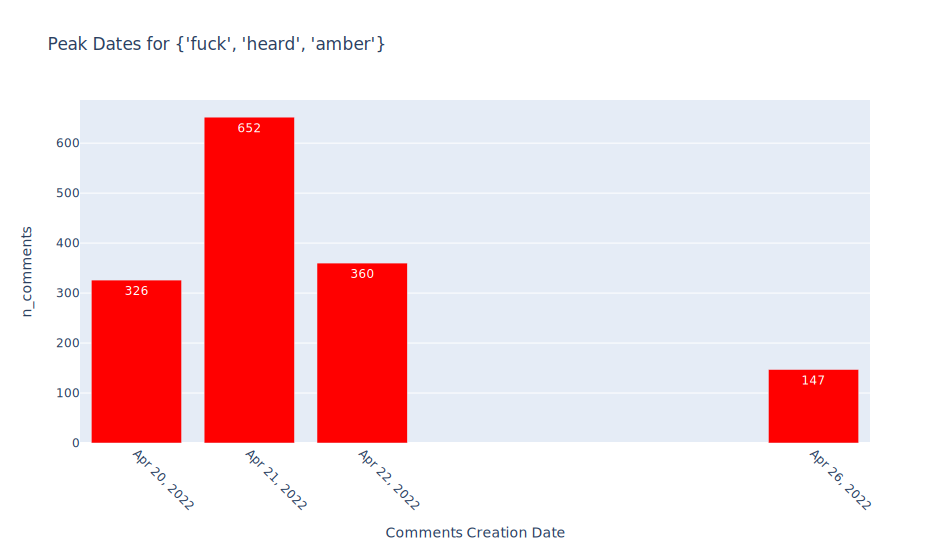

In [80]:
f.peak(4)

In [81]:
f.get_times()

560 tweets from 2602 tweets made in less than 1 min from previous tweet by 559 users


In [82]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
247727,1512961965093797888,2022-04-10 01:13:36+00:00,fuck amber heard.,"{fuck, amber, heard}",[],0,[JusticeForJohnnyDepp],1,1.132810e+18,kavickers23,...,1/3 of the all star nerds on youtube,"[star, nerds, youtube]",2022-04-10,2022.0,4.0,10.0,0 days 00:00:10,0.0,0.0,0.0
149219,1513906190081740802,2022-04-12 15:45:37+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,1.474535e+18,lilysaltt,...,meow for me kitten,"[meow, kitten]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:10,0.0,0.0,0.0
253572,1513957310162358274,2022-04-12 19:08:45+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,1.905983e+09,cassieissassyy,...,attention k mart shoppers ! univ. of az,"[attention, mart, shoppers, univ]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:11,0.0,0.0,0.0
253570,1513957314302205969,2022-04-12 19:08:46+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,2.474849e+09,fatboyoso,...,luv(sic),"[luv, sic]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:01,0.0,0.0,0.0
155680,1513982978342461446,2022-04-12 20:50:45+00:00,fuck you amber heard https://t.co/1s4by54wq2,"{fuck, amber, heard}",[],0,[JusticeForJohnnyDepp],1,1.263989e+18,ItsAngjolie,...,only for the only angelina jolie /\nangelina j...,"[angelina, jolie, angelina, jolie, wife]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:23,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165160,1519145988769861635,2022-04-27 02:46:42+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,7.468980e+08,xydney00,...,"ask for strength, not sympathy","[ask, strength, sympathy]",2022-04-27,2022.0,4.0,27.0,0 days 00:00:16,0.0,0.0,0.0
165156,1519146064993046528,2022-04-27 02:47:00+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,2.583219e+09,thatgirldebx3,...,mangia bene * ridi spesso * ama molto,"[mangia, bene, ridi, spesso, molto]",2022-04-27,2022.0,4.0,27.0,0 days 00:00:18,0.0,0.0,0.0
348770,1519478216536252416,2022-04-28 00:46:52+00:00,fuck amber heard,"{fuck, amber, heard}",[],0,[],0,1.376648e+18,marissssabellla,...,carter dean,"[carter, dean]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:34,0.0,0.0,0.0
371605,1519482226022490112,2022-04-28 01:02:47+00:00,fuck amber heard\nhttps://t.co/p9wpg0spni,"{fuck, amber, heard}",[],0,"[JusticeForJohnny, AmberTurd, CancelAmberTurd]",3,1.384805e+08,ItsBildo,...,"i'm just a guy, meandering thru life trying to...","[guy, meandering, thru, life, trying, bump, st...",2022-04-28,2022.0,4.0,28.0,0 days 00:00:24,0.0,0.0,0.0


In [83]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

247727   0 days 00:00:10
149219   0 days 00:00:10
253572   0 days 00:00:11
253570   0 days 00:00:01
155680   0 days 00:00:23
               ...      
165160   0 days 00:00:16
165156   0 days 00:00:18
348770   0 days 00:00:34
371605   0 days 00:00:24
341468   0 days 00:00:00
Name: diff, Length: 560, dtype: timedelta64[ns]

In [84]:
len(f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

559

In [85]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

sweetyhoneybby     2
__WillyG_          1
Dotty_19           1
mtayj              1
xohannah3_         1
                  ..
anti_saiyan        1
touchstarveddie    1
lilrosexoxo        1
onlypainszn        1
flvcko93           1
Name: user_name, Length: 559, dtype: int64

In [86]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    258
2022-04-20    106
2022-04-22     91
2022-04-19     21
2022-04-26     20
2022-04-13     13
2022-04-14     12
2022-04-25     11
2022-04-12      8
2022-04-23      8
2022-04-27      3
2022-04-28      3
2022-04-15      2
2022-04-24      2
2022-04-10      1
2022-04-17      1
Name: date, dtype: int64

In [87]:
list(f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['sweetyhoneybby',
 '__WillyG_',
 'Dotty_19',
 'mtayj',
 'xohannah3_',
 'King__Sanchez',
 'AmbitiousAnt410',
 'walbycurtis',
 'seapirata',
 'VoiceOfADeity',
 'ChefRustic420',
 'joceeyyy_',
 'SarahSiren16',
 'dubstephentai',
 'gelatojules',
 'rachellexv',
 'seokjinniekook',
 '__littleonex',
 'saraa_stimsonn',
 'g0ldcage',
 'TimeS0ldier',
 'M09RIAM',
 'cartiieraa',
 'BertsHurt',
 'amydolcee',
 'KinMakesMusic',
 'YRN_Quintrix',
 'trtl_raf',
 'Rose_flufff',
 'AltGirlAmelia',
 'yesstarismyname',
 'exoticmethods',
 'fuck_racists_',
 'TONGUETIED91',
 'golfinglegendxd',
 'kavickers23',
 'NotTodayEdBoy',
 'yvetterss',
 'WhitneyMarlene',
 'bigfinemami',
 'MyNameIsLegato',
 'HarrisJayden3',
 'diazxi_',
 'WlNXYCLUB',
 'teejaysantos99',
 'itskarolinaa',
 'brookecsuka_',
 'Jerome_Valeska1',
 'DinoTruth',
 'mmoldybread',
 'shariitachi',
 'samanthaccc_',
 'michikoxscape',
 '___________nl',
 'xojvnet',
 'TaiyoYozakura',
 'itsbeatfreak',
 'tristanssssss',
 'PxrnstarKastle',
 'bbenw7',
 'strawberriaxo',


In [88]:
f.get_df().mentions.value_counts()

[]                                   2569
[elonmusk]                              5
[wbpictures]                            3
[warnerbros]                            2
[realamberheard]                        2
[Riot_Bruh]                             1
[ke_Tsholo]                             1
[itssleann]                             1
[chrispinerd]                           1
[warnerbros, Disney]                    1
[aburkhartlaw]                          1
[TinthDoctor]                           1
[theMemesBot]                           1
[jerseypabo]                            1
[JessicaFey7]                           1
[LivingMagazineW]                       1
[wbpictures, warnerbros]                1
[delsruined]                            1
[Tenshi_KC]                             1
[JitasPrivate]                          1
[AshaleeeMarieee, LuLusgreeneyes]       1
[aquamanmovie]                          1
[teslaownersSV, elonmusk]               1
[iFangirlLots]                    

In [89]:
f.get_df().hashtags.value_counts()

[]                                                                                                                      2357
[JusticeForJohnnyDepp]                                                                                                   124
[JusticeForJohnnyDeep]                                                                                                    20
[JusticeForJohhnyDepp]                                                                                                    15
[JusticeforJohnnyDepp]                                                                                                     8
                                                                                                                        ... 
[JusticeForJohnnyDepp, JohnnyDeppVsAmberHeard]                                                                             1
[JohnnyDeppVsAmberHeard, JohnnyDeppDeservesJustice, JohnnyDeppIsInnocent, JohnnyDepp, AmberHeardIsALiar, AmberHeard]       1


<a id='dc'></a>
### remove amber heard from aquaman 2
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>

In [90]:
dc = SameText(df_tweets_2022_prepared, values.tokens[3])

In [91]:
dc.get_stats()

This text appeared 2441 in 2413 shape from 2350 users 


In [92]:
dc.get_metrics()

retweet_count    223.0
reply_count       31.0
like_count       675.0
quote_count       27.0
dtype: float64

In [93]:
dc.shapes(18)

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ibqxgaollz via    5
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/u13fwk01tj via    3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8ufry4v5oh via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jskuhhkmz0 via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/sznzup1qah via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/fbsjdqlz2g via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8829dkv21h via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/f8cym857dp via    2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/lmgrvonxuk via    2
dc entertainment: remove amber heard from aqua

In [94]:
dc.dates()

2022-04-28    1988
2022-04-25      69
2022-04-26      43
2022-04-23      33
2022-04-27      28
              ... 
2022-03-12       1
2022-03-01       1
2022-02-09       1
2022-04-07       1
2022-03-23       1
Name: date, Length: 91, dtype: int64

In [95]:
dc.get_df().id.value_counts()

1477511039835009025    1
1519720461780893696    1
1519720911397609473    1
1519720887217389568    1
1519720838857052165    1
                      ..
1519769892291067904    1
1519769768802144257    1
1519769601911017477    1
1519769478300680194    1
1515747609113202689    1
Name: id, Length: 2441, dtype: int64

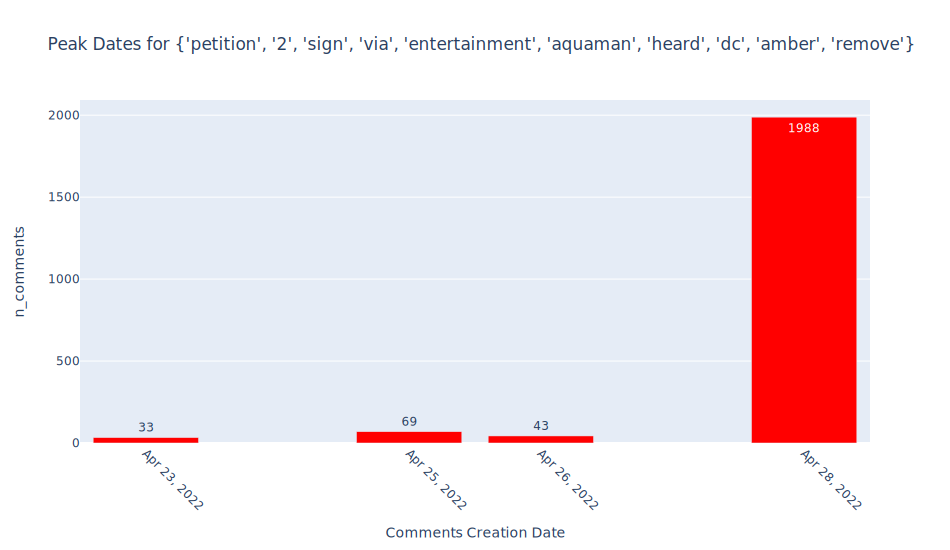

In [96]:
dc.peak(4)

In [97]:
dc.get_times()

1780 tweets from 2441 tweets made in less than 1 min from previous tweet by 1728 users


In [98]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
5889,1480746013962817537,2022-01-11 03:38:55+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[ChangePilipinas],1,[],0,1.027187e+08,gheldy16,...,justanothergirl || goingcrazy,"[justanothergirl, goingcrazy]",2022-01-11,2022.0,1.0,11.0,0 days 00:00:19,0.0,0.0,0.0
4663,1481200803620995072,2022-01-12 09:46:05+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[ChangeOrg_India],1,[],0,9.095964e+07,atmatman,...,NaN,NaN,2022-01-12,2022.0,1.0,12.0,0 days 00:00:11,0.0,0.0,0.0
2871,1481601521246740483,2022-01-13 12:18:24+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[Change],1,[],0,5.497290e+08,tskuninski,...,business inquiries: tskuninski@abv.bg,"[business, inquiries, tskuninski]",2022-01-13,2022.0,1.0,13.0,0 days 00:00:31,0.0,0.0,0.0
255813,1513885343984066564,2022-04-12 14:22:47+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[Change],1,[],0,3.407330e+08,JonPomplin,...,"owner declassified records. producer, bassist,...","[owner, declassified, records, producer, bassi...",2022-04-12,2022.0,4.0,12.0,0 days 00:00:44,0.0,0.0,0.0
438135,1514033390789570561,2022-04-13 00:11:04+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[Change],1,[],0,1.512066e+18,emma55161576,...,snap:emmarobbins21 instagram:emmarobbins2145 t...,"[snap, emmarobbins21, instagram, emmarobbins21...",2022-04-13,2022.0,4.0,13.0,0 days 00:00:32,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347010,1519827210663870465,2022-04-28 23:53:38+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[UKChange],1,[],0,1.510400e+18,Doctor__Walker,...,starfleet medical academy instructor.,"[starfleet, medical, academy, instructor]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:30,0.0,0.0,0.0
346994,1519827337453481986,2022-04-28 23:54:08+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[Change],1,[],0,2.532095e+09,AmericanBuddha8,...,"he/him brother, uncle, dreamer, streamer, yout...","[brother, uncle, dreamer, streamer, youtuber, ...",2022-04-28,2022.0,4.0,28.0,0 days 00:00:30,0.0,0.0,0.0
346956,1519827733957967872,2022-04-28 23:55:43+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[ChangeAUS],1,[],0,7.961561e+17,Talon_xExo101,...,NaN,NaN,2022-04-28,2022.0,4.0,28.0,0 days 00:00:21,0.0,0.0,0.0
346954,1519827777314332672,2022-04-28 23:55:53+00:00,dc entertainment: remove amber heard from aqua...,"{petition, 2, sign, entertainment, via, aquama...",[CdnChange],1,[],0,9.294694e+17,OfficiallyEldon,...,actor living in his own world.\nwho am i really?,"[actor, living, world, really]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:10,0.0,0.0,0.0


In [99]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

5889     0 days 00:00:19
4663     0 days 00:00:11
2871     0 days 00:00:31
255813   0 days 00:00:44
438135   0 days 00:00:32
               ...      
347010   0 days 00:00:30
346994   0 days 00:00:30
346956   0 days 00:00:21
346954   0 days 00:00:10
346953   0 days 00:00:02
Name: diff, Length: 1780, dtype: timedelta64[ns]

In [100]:
len(dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

1728

In [101]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

Jaybee342          6
belizario20        3
eureka404s         3
ZhyeMinB           2
katy_lady          2
                  ..
HaleyBauguess      1
yoongi0507_        1
JasonCerfy         1
nnananadine        1
georginajames__    1
Name: user_name, Length: 1728, dtype: int64

In [102]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-28    1750
2022-04-25      14
2022-04-23       6
2022-04-26       2
2022-01-11       1
2022-01-12       1
2022-01-13       1
2022-04-12       1
2022-04-13       1
2022-04-22       1
2022-04-24       1
2022-04-27       1
Name: date, dtype: int64

In [103]:
list(dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['Jaybee342',
 'belizario20',
 'eureka404s',
 'ZhyeMinB',
 'katy_lady',
 'MariaHatzi2',
 'liverbird0762',
 'julliianacf',
 'AAAngelaJo1',
 'Melfleur1',
 'MeghanUnhinged',
 'godconscious22',
 'mssikana',
 'Domingo92971253',
 'DyneZlayer',
 'Mothmoon2',
 'Sassygirl05K55',
 'peykumori',
 'theangelsofjay',
 'johnwhitney79',
 'carlzday',
 'RanjotRandhawa',
 'berrykaker',
 'InstinctSamM8',
 'Rejuvinatez',
 '7mak89',
 'chizzy201',
 'Rohan69696969v',
 'PrapulGowda9',
 'sherryblack2017',
 'ShalalaMeowMeow',
 'bruce483',
 'KingOfNopes',
 'GetLifeBitch',
 'Richard80555331',
 'ma81349823',
 'AdamW64622558',
 'levis3331',
 'KRYSTAL1974',
 'J006006',
 'nicola_nic1973',
 'Sarah_Smiff',
 'DomAshton4',
 'heyinej',
 'strombergalice',
 'GabrielPerez58',
 'maew1970',
 'SirNyathikazi',
 'FredPedemonti',
 'Sambeet_M',
 'isabel_19026',
 'JorlizL',
 'JoPoTaTo21',
 'sawneymcd',
 'Pegifur',
 'Micaela08328287',
 'nikkiharg',
 'brysynnn',
 'B17935',
 'trashbag4001',
 'Beyondcomps_uk',
 'MrNASM',
 'olicityslight',

In [104]:
dc.get_df().mentions.value_counts()

[Change]                                                                        1625
[UKChange]                                                                       405
[CdnChange]                                                                      134
[ChangeOrg_India]                                                                 86
[ChangeAUS]                                                                       58
[ChangePilipinas]                                                                 55
[ChangeorgSA]                                                                     23
[ChangeOrgKE]                                                                      8
[Change_Mex]                                                                       4
[ChangeGER]                                                                        3
[ChangeorgLatino]                                                                  2
[ChangeFrance]                                                   

In [105]:
dc.get_df().hashtags.value_counts()

[]                                                                                          2161
[JusticeForJohnnyDepp]                                                                        32
[JusticeForJohhnyDepp]                                                                        10
[JusticeForJohnnyDepp, AmberTurd]                                                              5
[JusticeForJohnny]                                                                             4
                                                                                            ... 
[melbourne, sydney, perth, brisbane, adelaide, JusticeForJohnnyDepp]                           1
[JusticeForJohhnyDepp, AmberTurd, AmberHeardIsALiar, JohnnyDepp, JohnnyDeppVsAmberHeard]       1
[AmberTurd, JusticeForJohnnyDepp, AmberHeardIsAnAbuser, AmberHeardAbusedJohnnyDepp]            1
[IStandWithJohnnyDepp, JusticeForJohnnyDepp]                                                   1
[JohnnyDeppDeservesJustice, St

<a id='gm'></a>
### good morining everyone except amber hear
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [106]:
gm = SameText(df_tweets_2022_prepared, values.tokens[4])

In [107]:
gm.get_stats()

This text appeared 391 in 55 shape from 388 users 


In [108]:
gm.get_metrics()

retweet_count    1212.0
reply_count       167.0
like_count       8348.0
quote_count        41.0
dtype: float64

In [109]:
gm.shapes(18)

good morning to everyone except amber heard                               211
good morning to everyone except amber heard.                               80
good morning to everyone, except amber heard                               10
good morning to everyone, except amber heard.                               9
good morning everyone except amber heard                                    9
good morning to everyone except for amber heard                             8
good morning to everyone except for amber heard.                            6
good morning to everyone except amber heard!                                5
good morning everyone, except amber heard                                   3
good morning everyone except amber heard.                                   2
good morning to everyone\nexcept amber heard                                2
good morning everyone except for amber heard                                2
good morning for everyone except amber heard                    

In [110]:
gm.dates()

2022-04-22    64
2022-04-21    58
2022-04-25    39
2022-04-23    33
2022-04-27    30
2022-04-28    29
2022-04-26    28
2022-04-20    25
2022-04-24    21
2022-04-19    16
2022-04-16    14
2022-04-18    12
2022-04-15     9
2022-04-14     3
2022-04-17     3
2022-04-12     1
2022-02-02     1
2022-04-11     1
2022-03-26     1
2022-04-13     1
2022-03-21     1
2022-02-23     1
Name: date, dtype: int64

In [111]:
gm.get_df().id.value_counts()

1496525633001766915    1
1519590888917327873    1
1519674429109948416    1
1519698112507437061    1
1519698215574007808    1
                      ..
1519334148208537600    1
1519335651312750592    1
1519337423011934208    1
1519228015779139587    1
1515754608055967755    1
Name: id, Length: 391, dtype: int64

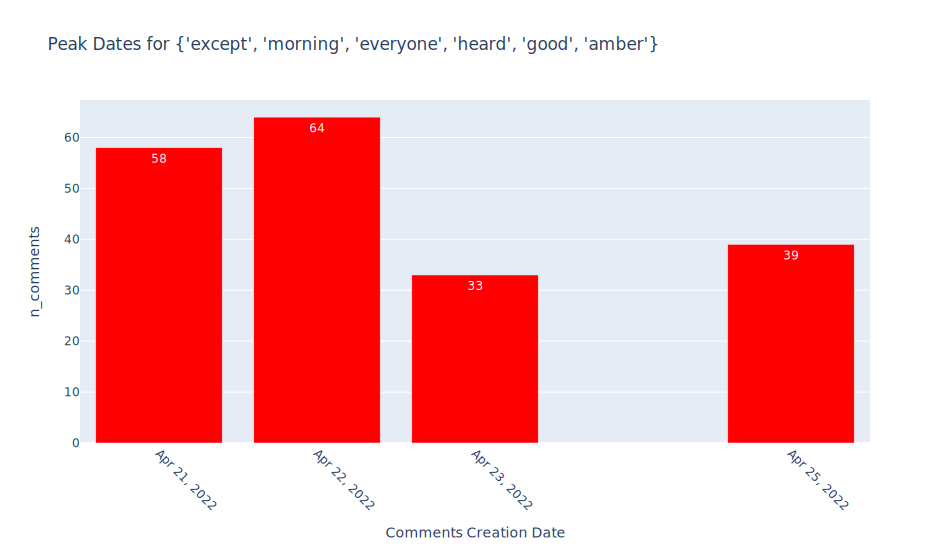

In [112]:
gm.peak(4)

In [113]:
gm.get_times()

25 tweets from 391 tweets made in less than 1 min from previous tweet by 25 users


In [114]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
69330,1515323775625175054,2022-04-16 13:38:36+00:00,good morning to everyone except amber heard.,"{except, morning, everyone, heard, good, amber}",[],0,[],0,1.337841e+18,mamakate92,...,mama and wife,"[mama, wife]",2022-04-16,2022.0,4.0,16.0,0 days 00:00:54,0.0,0.0,0.0
69329,1515323948040433664,2022-04-16 13:39:17+00:00,good morning to everyone except for amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,2.785079e+09,LazaretBro,...,go fuck yourself,"[go, fuck]",2022-04-16,2022.0,4.0,16.0,0 days 00:00:41,0.0,0.0,0.0
228320,1516781799879450625,2022-04-20 14:12:16+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,3.054049e+09,z_lambiase,...,beep boop,"[beep, boop]",2022-04-20,2022.0,4.0,20.0,0 days 00:00:50,0.0,0.0,0.0
126308,1517119988246659075,2022-04-21 12:36:06+00:00,good morning to everyone except amber heard.,"{except, morning, everyone, heard, good, amber}",[],0,[],0,2.723942e+07,caresselle,...,mom. professional hype girl. farm kid. lover o...,"[mom, professional, hype, girl, farm, kid, lov...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:34,0.0,0.0,0.0
566377,1517124875072200706,2022-04-21 12:55:31+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,7.487138e+17,kasssierey,...,boy mom * coffee whore * aries,"[boy, mom, coffee, whore, aries]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:29,0.0,0.0,0.0
530882,1517127280262266883,2022-04-21 13:05:05+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,7.441465e+08,Aaronsfreakflag,...,gaga stan.,"[gaga, stan]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:59,0.0,0.0,0.0
129978,1517387232897871872,2022-04-22 06:18:02+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,1.628905e+09,angiebv95,...,alt er love,[love],2022-04-22,2022.0,4.0,22.0,0 days 00:00:53,0.0,0.0,0.0
113001,1517455907696824322,2022-04-22 10:50:56+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,5.802808e+08,slbrown1994,...,gay. respiratory therapist. pisces,"[gay, respiratory, therapist, pisces]",2022-04-22,2022.0,4.0,22.0,0 days 00:00:38,0.0,0.0,0.0
132281,1517498825753206785,2022-04-22 13:41:28+00:00,good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,3.704575e+07,sstephanieelynn,...,NaN,NaN,2022-04-22,2022.0,4.0,22.0,0 days 00:00:21,0.0,0.0,0.0
103216,1517503968842338306,2022-04-22 14:01:54+00:00,also good morning to everyone except amber heard,"{except, morning, everyone, heard, good, amber}",[],0,[],0,9.346379e+07,heaathafeathaa,...,"this one time, i had a baby in my car at @chev...","[time, baby, car, chevron, blm, freebritney, v...",2022-04-22,2022.0,4.0,22.0,0 days 00:00:31,0.0,0.0,0.0


In [115]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

69330    0 days 00:00:54
69329    0 days 00:00:41
228320   0 days 00:00:50
126308   0 days 00:00:34
566377   0 days 00:00:29
530882   0 days 00:00:59
129978   0 days 00:00:53
113001   0 days 00:00:38
132281   0 days 00:00:21
103216   0 days 00:00:31
104944   0 days 00:00:56
147385   0 days 00:00:06
143040   0 days 00:00:24
143014   0 days 00:00:59
147944   0 days 00:00:25
326133   0 days 00:00:44
326125   0 days 00:00:53
307630   0 days 00:00:15
302823   0 days 00:00:42
297867   0 days 00:00:13
296386   0 days 00:00:34
202693   0 days 00:00:55
215191   0 days 00:00:17
212094   0 days 00:00:52
360133   0 days 00:00:24
Name: diff, dtype: timedelta64[ns]

In [116]:
len(gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

25

In [117]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

mamakate92         1
halftime_hannah    1
abbys0ul_          1
Grits_southern     1
yunngtrashcan      1
siimplistiic04     1
its_laura_lou      1
becca_nicole16     1
keithontheradio    1
LoreleiOhMy        1
_angelique444      1
BrynTaelar_        1
bmariesdope        1
LazaretBro         1
_SunSpirit         1
armon_mikal        1
heaathafeathaa     1
sstephanieelynn    1
slbrown1994        1
angiebv95          1
Aaronsfreakflag    1
kasssierey         1
caresselle         1
z_lambiase         1
lesliesalem2day    1
Name: user_name, dtype: int64

In [118]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-22    5
2022-04-23    4
2022-04-25    4
2022-04-21    3
2022-04-27    3
2022-04-16    2
2022-04-26    2
2022-04-20    1
2022-04-28    1
Name: date, dtype: int64

In [119]:
list(gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['mamakate92',
 'halftime_hannah',
 'abbys0ul_',
 'Grits_southern',
 'yunngtrashcan',
 'siimplistiic04',
 'its_laura_lou',
 'becca_nicole16',
 'keithontheradio',
 'LoreleiOhMy',
 '_angelique444',
 'BrynTaelar_',
 'bmariesdope',
 'LazaretBro',
 '_SunSpirit',
 'armon_mikal',
 'heaathafeathaa',
 'sstephanieelynn',
 'slbrown1994',
 'angiebv95',
 'Aaronsfreakflag',
 'kasssierey',
 'caresselle',
 'z_lambiase',
 'lesliesalem2day']

In [120]:
gm.get_df().mentions.value_counts()

[]                   386
[ScreenMix]            1
[greg16676935420]      1
[jadapsmith]           1
[YourBoyTippy]         1
[KimKardashian]        1
Name: mentions, dtype: int64

In [121]:
gm.get_df().hashtags.value_counts()

[]                                                                                                                                       337
[JusticeForJohnnyDepp]                                                                                                                    15
[JusticeForJohnnyDeep]                                                                                                                     5
[JohnnyDeppDeservesJustice]                                                                                                                4
[JusticeForJohnny]                                                                                                                         3
[JusticeForJohhnyDepp]                                                                                                                     3
[JusticeforJohnnyDepp]                                                                                                                     2
[IStandWithJo

<a id='aj'></a>
### amber heard johnny depp
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [122]:
aj = SameText(df_tweets_2022_prepared, values.tokens[7])

In [123]:
aj.get_stats()

This text appeared 288 in 204 shape from 277 users 


In [124]:
aj.get_metrics()

retweet_count     580.0
reply_count       266.0
like_count       4265.0
quote_count        80.0
dtype: float64

In [125]:
aj.shapes(18)

johnny depp and amber heard                       22
johnny depp amber heard                           10
amber heard and johnny depp                       10
johnny depp > amber heard                          9
johnny depp & amber heard                          6
johnny depp y amber heard                          5
johnny depp\namber heard                           4
amber heard\njohnny depp                           4
johnny depp v amber heard                          4
johnny depp or amber heard?                        3
amber heard johnny depp                            3
amber heard & johnny depp                          3
johnny depp and amber heard?                       3
i don't care about johnny depp and amber heard     2
johnny depp et amber heard                         2
johnny depp and amber heard...                     2
johnny depp ve amber heard                         2
johnny depp or amber heard ?                       2
Name: clean_text, dtype: int64

In [126]:
aj.dates()

2022-04-21    40
2022-04-22    34
2022-04-27    30
2022-04-26    28
2022-04-20    26
2022-04-28    20
2022-04-25    19
2022-04-23    19
2022-04-24    14
2022-04-13     6
2022-04-17     5
2022-04-19     5
2022-04-16     5
2022-04-15     3
2022-01-05     2
2022-04-09     2
2022-04-10     2
2022-04-12     2
2022-01-04     2
2022-03-31     2
2022-03-10     2
2022-04-14     1
2022-01-13     1
2022-01-30     1
2022-01-29     1
2022-01-23     1
2022-04-06     1
2022-02-17     1
2022-02-28     1
2022-02-08     1
2022-03-19     1
2022-03-08     1
2022-03-28     1
2022-03-14     1
2022-03-07     1
2022-03-20     1
2022-03-26     1
2022-03-27     1
2022-04-11     1
2022-03-11     1
2022-02-16     1
Name: date, dtype: int64

In [127]:
aj.get_df().id.value_counts()

1478231623376281601    1
1478278892892962816    1
1519753225800503302    1
1519737597836378112    1
1519771620788903937    1
                      ..
1519419362481999877    1
1519366045349384192    1
1519369540576190469    1
1519372374684192770    1
1515708580267282436    1
Name: id, Length: 288, dtype: int64

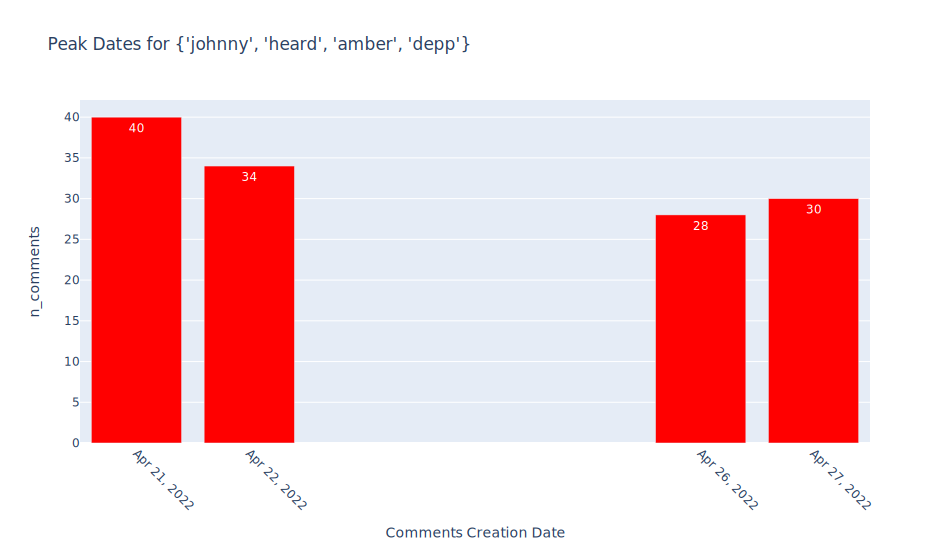

In [128]:
aj.peak(4)

In [129]:
aj.get_times()

12 tweets from 288 tweets made in less than 1 min from previous tweet by 11 users


In [130]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
216915,1516798356319842306,2022-04-20 15:18:03+00:00,amber heard\njohnny depp,"{johnny, amber, heard, depp}",[],0,[],0,1.985733e+08,jazoncleto,...,religiao: espirita\npolitica: direita\ninstagr...,"[religiao, espirita, politica, direita, instag...",2022-04-20,2022.0,4.0,20.0,0 days 00:00:36,0.0,0.0,0.0
216892,1516798568425791495,2022-04-20 15:18:54+00:00,amber heard\njohnny depp,"{johnny, amber, heard, depp}",[],0,[],0,1.985733e+08,jazoncleto,...,religiao: espirita\npolitica: direita\ninstagr...,"[religiao, espirita, politica, direita, instag...",2022-04-20,2022.0,4.0,20.0,0 days 00:00:51,0.0,0.0,0.0
234719,1516842154961821700,2022-04-20 18:12:05+00:00,johnny depp amber heard\n !\nhttps://t.co/1b4x...,"{johnny, amber, heard, depp}",[],0,[HeToo],1,5.241763e+08,MyHeartAmerica,...,americafirst law & order due process libertyis...,"[americafirst, law, order, due, process, liber...",2022-04-20,2022.0,4.0,20.0,0 days 00:00:21,0.0,0.0,0.0
236793,1516860767521234944,2022-04-20 19:26:03+00:00,johnny depp vs. amber heard\nhttps://t.co/nrgk...,"{johnny, amber, heard, depp}",[],0,[],0,1.502948e+18,helixhapa,...,is there life on mars? a starry-eyed girl look...,"[life, mars, girl, looking, cosmic, love, emo,...",2022-04-20,2022.0,4.0,20.0,0 days 00:00:19,0.0,0.0,0.0
126764,1517116508077449219,2022-04-21 12:22:16+00:00,johnny depp > amber heard,"{johnny, amber, heard, depp}",[],0,[],0,5.792118e+08,orhanvstheworld,...,/ who is evil now ? / super straight / atypisc...,"[evil, super, straight, atypisch, nonstandard]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:44,0.0,0.0,0.0
539277,1517216255538835460,2022-04-21 18:58:38+00:00,"what... ""amber heard to johnny depp""","{johnny, amber, heard, depp}",[sfdaya],1,[],0,4.238198e+08,jenamooo,...,NaN,NaN,2022-04-21,2022.0,4.0,21.0,0 days 00:00:11,0.0,0.0,0.0
543707,1517291088721063937,2022-04-21 23:56:00+00:00,johnny depp and amber heard,"{johnny, amber, heard, depp}",[peaches07],1,[],0,1.425483e+18,JCPnnywse,...,...but we still clowning. long live @on_verbs ...,"[still, clowning, long, live, psn, twitch, dis...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:30,0.0,0.0,0.0
543703,1517291101010337795,2022-04-21 23:56:03+00:00,johnny depp and amber heard,"{johnny, amber, heard, depp}",[peaches07],1,[],0,6.031509e+07,_harleyy_quinnn,...,NaN,NaN,2022-04-21,2022.0,4.0,21.0,0 days 00:00:03,0.0,0.0,0.0
543688,1517291262747070465,2022-04-21 23:56:41+00:00,johnny depp and amber heard,"{johnny, amber, heard, depp}",[peaches07],1,[],0,2.426423e+07,AmandaDannielle,...,"retired seminarian, m.div, heretic. black femi...","[retired, seminarian, heretic, black, feminist...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:38,0.0,0.0,0.0
133657,1517547168055316481,2022-04-22 16:53:34+00:00,"amber heard, johnny depp's ex-wife","{johnny, amber, heard, depp}","[Rob56418354, sportsblond]",2,[],0,1.828931e+08,mattcleckner,...,"vikings/twins/guns/volunteer/cars/nerd , happi...","[happily, married, dad, ig, https, stan, life]",2022-04-22,2022.0,4.0,22.0,0 days 00:00:59,0.0,0.0,0.0


In [131]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

216915   0 days 00:00:36
216892   0 days 00:00:51
234719   0 days 00:00:21
236793   0 days 00:00:19
126764   0 days 00:00:44
539277   0 days 00:00:11
543707   0 days 00:00:30
543703   0 days 00:00:03
543688   0 days 00:00:38
133657   0 days 00:00:59
271546   0 days 00:00:05
345291   0 days 00:00:39
Name: diff, dtype: timedelta64[ns]

In [132]:
len(aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

11

In [133]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

jazoncleto         2
MyHeartAmerica     1
helixhapa          1
orhanvstheworld    1
jenamooo           1
JCPnnywse          1
_harleyy_quinnn    1
AmandaDannielle    1
mattcleckner       1
King_Resmi         1
MrMukko            1
Name: user_name, dtype: int64

In [134]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    5
2022-04-20    4
2022-04-22    1
2022-04-26    1
2022-04-28    1
Name: date, dtype: int64

In [135]:
list(aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['jazoncleto',
 'MyHeartAmerica',
 'helixhapa',
 'orhanvstheworld',
 'jenamooo',
 'JCPnnywse',
 '_harleyy_quinnn',
 'AmandaDannielle',
 'mattcleckner',
 'King_Resmi',
 'MrMukko']

In [136]:
aj.get_df().mentions.value_counts()

[]                              178
[peaches07]                       4
[sfdaya]                          2
[AXN_LA]                          2
[fishant_rat, thatqueerkiwi]      1
                               ... 
[barkboycolbs]                    1
[InfernoOmni]                     1
[christinebarnum]                 1
[iHrtViolet]                      1
[lotuseaters_com]                 1
Name: mentions, Length: 106, dtype: int64

In [137]:
aj.get_df().hashtags.value_counts()

[]                                                                                                                                                               248
[JusticeForJohnnyDepp]                                                                                                                                             6
[JusticeForJohnnyDepp, JohnnyDepp]                                                                                                                                 2
[JusticeForJohnnyDepp, JohnnyDeppIsInnocent, IStandWithJohnnyDepp, JohnnyDepp, AmberHeardIsALiar, AmberHeardIsAnAbuser, AmberHeardDeservesPrison, AmberHeard]      1
[pirateofthecarribean, JohnnyDepp, AmberHeard]                                                                                                                     1
[MePoo, HeToo]                                                                                                                                                     1
[JusticeFo

<a id='h'></a>
### homies hate amber heard
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [138]:
h = SameText(df_tweets_2022_prepared, values.tokens[9])

In [139]:
h.get_stats()

This text appeared 241 in 33 shape from 239 users 


In [140]:
h.get_metrics()

retweet_count     89.0
reply_count       37.0
like_count       619.0
quote_count        4.0
dtype: float64

In [141]:
h.shapes(18)

all my homies hate amber heard                             154
all the homies hate amber heard                             19
all my homies hate amber heard.                             13
me and all my homies hate amber heard                       10
me and my homies hate amber heard                            9
me and the homies hate amber heard                           6
all my homies hate amber heard!!!                            2
me & all my homies hate amber heard                          2
me and my homies all hate amber heard                        2
all my homies hate amber heard!                              1
all my homies and i hate amber heard                         1
me and my homies hate amber heard !                          1
all my homies hate amber heard\nhttps://t.co/kqxvcbqrif      1
all my homies hate amber heard. https://t.co/fjzf4rexmv      1
all the homies hate amber heard.                             1
me n my homies hate amber heard                        

In [142]:
h.dates()

2022-04-21    57
2022-04-22    41
2022-04-20    27
2022-04-25    16
2022-04-26    15
2022-04-23    14
2022-04-27    14
2022-04-28    11
2022-04-14     9
2022-04-24     8
2022-04-13     6
2022-04-12     4
2022-04-15     3
2022-04-19     3
2022-04-11     2
2022-04-16     2
2022-01-29     1
2022-03-19     1
2022-03-06     1
2022-03-24     1
2022-04-10     1
2022-02-03     1
2022-02-13     1
2022-02-22     1
2022-01-16     1
Name: date, dtype: int64

In [143]:
h.get_df().id.value_counts()

1482609591544254467    1
1519040407891546113    1
1519618202141179904    1
1519482443601903617    1
1516483109679677448    1
                      ..
1516794569999876102    1
1516897250701586432    1
1516895210545897473    1
1516887949052239874    1
1517121385600016391    1
Name: id, Length: 241, dtype: int64

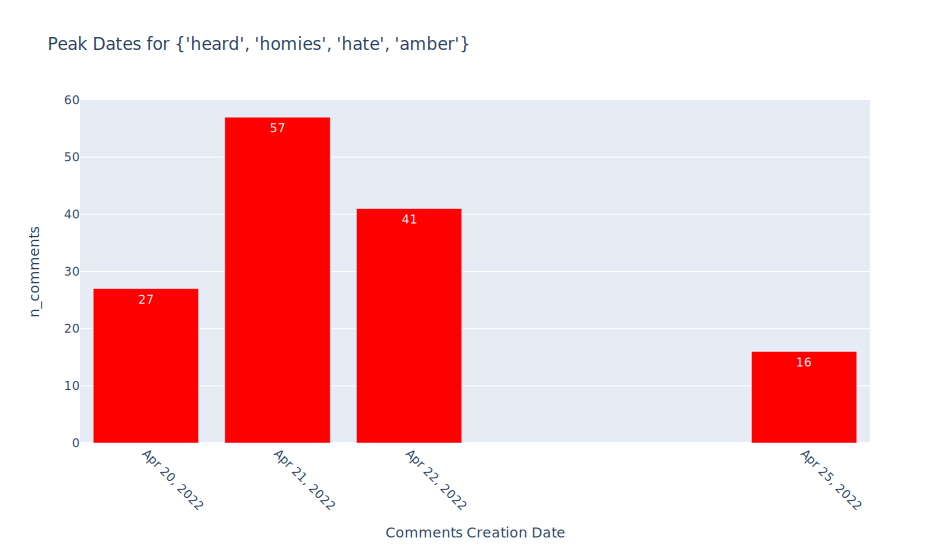

In [144]:
h.peak(4)

In [145]:
h.get_times()

5 tweets from 241 tweets made in less than 1 min from previous tweet by 4 users


In [146]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
549782,1516969870109331457,2022-04-21 02:39:35+00:00,all my homies hate amber heard,"{homies, amber, hate, heard}",[],0,[],0,9.119851e+17,ADpandaHD,...,"panchiyamu\n?tsu**?tsu\nm 27 he/him\nglover\n""...","[panchiyamu, tsu, tsu, 27, glover, depends, 02...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:43,0.0,0.0,0.0
549771,1516969965966004226,2022-04-21 02:39:58+00:00,all my homies hate amber heard,"{homies, amber, hate, heard}",[britt_stallwood],1,[],0,9.119851e+17,ADpandaHD,...,"panchiyamu\n?tsu**?tsu\nm 27 he/him\nglover\n""...","[panchiyamu, tsu, tsu, 27, glover, depends, 02...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:23,0.0,0.0,0.0
566049,1517262880252510210,2022-04-21 22:03:54+00:00,all my homies hate amber heard,"{homies, amber, hate, heard}",[],0,[],0,1.470126e+18,spaghettimommyy,...,no tw's!!! please dm!! need someone,"[tw, please, dm, need, someone]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:38,0.0,0.0,0.0
565872,1517263835455012865,2022-04-21 22:07:42+00:00,me and the homies hate amber heard,"{homies, amber, hate, heard}",[tristanssssss],1,[],0,9.213906e+17,Hjakephillips,...,"u of mw xc/tf alumni, colorblind enthusiast","[mw, alumni, colorblind, enthusiast]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:04,0.0,0.0,0.0
318679,1518719799727116289,2022-04-25 22:33:11+00:00,all my homies hate amber heard,"{homies, amber, hate, heard}",[Perkz],1,[],0,9.623332e+17,Keepitdone,...,NaN,NaN,2022-04-25,2022.0,4.0,25.0,0 days 00:00:15,0.0,0.0,0.0


In [147]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

549782   0 days 00:00:43
549771   0 days 00:00:23
566049   0 days 00:00:38
565872   0 days 00:00:04
318679   0 days 00:00:15
Name: diff, dtype: timedelta64[ns]

In [148]:
len(h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

4

In [149]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

ADpandaHD          2
spaghettimommyy    1
Hjakephillips      1
Keepitdone         1
Name: user_name, dtype: int64

In [150]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    5
2022-04-20    4
2022-04-22    1
2022-04-26    1
2022-04-28    1
Name: date, dtype: int64

In [151]:
list(h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['ADpandaHD', 'spaghettimommyy', 'Hjakephillips', 'Keepitdone']

In [152]:
h.get_df().mentions.value_counts()

[]                                                  202
[tristanssssss]                                       2
[cumcurse]                                            1
[hormoshorlah]                                        1
[carlaleozmaurer]                                     1
[Snedgie]                                             1
[Comverse121]                                         1
[Hishmeh26]                                           1
[Perkz]                                               1
[marvin608]                                           1
[shawnwick666]                                        1
[butterflywteeth]                                     1
[SilentD_88]                                          1
[ExtraSyrian]                                         1
[desskittyy]                                          1
[Acnh2Bean]                                           1
[britt_stallwood]                                     1
[adxm1878]                                      

In [153]:
h.get_df().hashtags.value_counts()

[]                             234
[JusticeForJohnnyDepp]           4
[JohnnyDeppDeservesJustice]      2
[fuckAmberHeard]                 1
Name: hashtags, dtype: int64

In [154]:
values.head(50)

,tokens,n_tweets
0,"{'johnny', 'depp'}",3248
1,"{'heard', 'amber'}",2953
2,"{'fuck', 'heard', 'amber'}",2601
3,"{'petition', '2', 'sign', 'via', 'entertainmen...",2440
4,"{'except', 'morning', 'everyone', 'heard', 'go...",391
5,{'yes'},308
6,"{'2', 'peticion', 'via', 'entertainment', 'aqu...",296
7,"{'johnny', 'heard', 'amber', 'depp'}",287
8,{'love'},256
9,"{'heard', 'homies', 'hate', 'amber'}",233
